In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import split

In [83]:
# filename = 'DeepSeg/06Classification_ClassifyActivity/train_stats.txt'
# filename = 'DeepSeg/04Segment_StateInference/train_stats.txt'
# filename = 'DeepSeg/04Segment_StateInference/gpu_many_antennas.log'
# filename = 'DeepSeg/06Classification_ClassifyActivity/gpu_many_antennas_2.log'
# filename = 'DeepSeg/06Classification_ClassifyActivity/gpu_many_antennas_removed_layers.log'
# filename = 'DeepSeg/06Classification_ClassifyActivity/gpu_many_antennas_removed_layers_firstdropout02.log'
# filename = 'DeepSeg/04Segment_StateInference/gpu_many_antennas_ndg_single.log'
# filename = 'DeepSeg/04Segment_StateInference/local_single_test6.log'

In [84]:
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/DS_ALL_3_fixed10_120.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/DS_ALL_3_fixed31288432_120.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/DS_ALL_5_fixed10_120.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/DS_ALL_6_fixed10_120.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/DS_ALL_6_fixed31288432_120.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/DS_user1_3_fixed31288432_120.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/DS_user1_6_fixed31288432_120.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/MOD_EXT_3_fixed10_60_s1_22_s2_42.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/MOD_EXT_5_fixed10_60_s1_22_s2_42.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/MOD_EXT_6_fixed10_60_s1_22_s2_42.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/MOD_ownUser1_3_fixed10_60_s1_22_s2_42.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/MOD_ownUser1_5_fixed10_60_s1_22_s2_42.log'
# filename = 'DeepSeg/04Segment_StateInference/prod_logs/MOD_ownUser1_6_fixed10_60_s1_22_s2_42.log'

# filename = 'DeepSeg/06Classification_ClassifyActivity/prod_logs/MOD_EXT_3_fixed10_100_s1_22_s2_52_mp86.log'
filename = 'DeepSeg/06Classification_ClassifyActivity/prod_logs/DS_ALL_6_fixed31288432_200.log'
# filename = 'DeepSeg/06Classification_ClassifyActivity/prod_logs/MOD_ownUser1_3_fixed10_100_s1_32_s2_42_mp76.log'

In [85]:
df = pd.read_csv(filename, sep=r'\s+', header=None, skiprows=lambda i: not str(open(filename).readlines()[i]).startswith('Ep'))
df.columns = ['Epoch', 'epoch_duration', 'lossLab', 'TrainAcc', 'testAcc', 'maxAcc', 'bestEp', 'testAccE', 'testF1E', 'maxAccE', 'maxF1E', 'unknown']
# for all columns, set the value to the part of the value behind the equals sign
for col in df.columns:
    df[col] = df[col].apply(lambda x: x.split('=')[1] if '=' in x else x)
# change column types
df = df.astype({'Epoch': str, 'epoch_duration': str, 'lossLab': float, 'TrainAcc': float, 'testAcc': float, 'maxAcc': float, 'bestEp': str, 'testAccE': float, 'testF1E': float, 'maxAccE': float, 'maxF1E': float, 'unknown': str})
df['testAcc'] = df['testAcc'] / 100
df['Epoch'] = df['Epoch'].str.lstrip('Ep')
df['bestEp'] = df['bestEp'].str.lstrip('Ep')
# change epoch type to int
df = df.astype({'Epoch': int, 'bestEp': int})
df.set_index('Epoch', inplace=True)
df

,epoch_duration,lossLab,TrainAcc,testAcc,maxAcc,bestEp,testAccE,testF1E,maxAccE,maxF1E,unknown
Epoch,,,,,,,,,,,
0,5s,33.5586,0.1106,0.1083,10.83,0,11.67,6.19,11.67,6.19,Ep0
1,2s,2.4105,0.1114,0.1458,14.58,1,15.00,8.76,15.00,8.76,Ep1
2,2s,2.2560,0.1490,0.1625,16.25,2,13.33,6.61,15.00,8.76,Ep1
3,2s,2.1457,0.1883,0.2042,20.42,3,13.33,6.70,15.00,8.76,Ep1
4,2s,2.0929,0.2300,0.2833,28.33,4,13.75,7.80,15.00,8.76,Ep1
...,...,...,...,...,...,...,...,...,...,...,...
80,2s,0.0002,1.0000,0.7708,77.92,76,39.58,36.37,39.58,36.37,Ep80
81,2s,0.0002,1.0000,0.7708,77.92,76,42.08,38.58,42.08,38.58,Ep81
82,2s,0.0001,1.0000,0.7708,77.92,76,45.00,41.60,45.00,41.60,Ep82


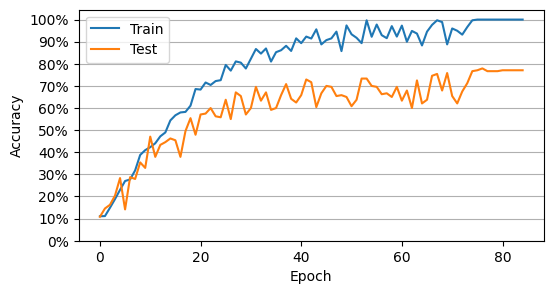

In [86]:
plt.figure(figsize=(6, 3))
# plt.title(f'Accuracy on Train and Test Set During Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
# mvoe legend to the bottom right
sns.lineplot(data=df, x='Epoch', y='TrainAcc', label='Train')
sns.lineplot(data=df, x='Epoch', y='testAcc', label='Test')
plt.legend(loc='best')
plt.yticks([i/10 for i in range(0, 11)], labels=[f'{i*10}%' for i in range(0, 11)])
plt.grid(axis='y')
plt.savefig('plots/training_accuracies_DS_ALL_6_fixed31288432_200.svg', bbox_inches='tight', dpi=600)
plt.show()

Text(0.5, 1.0, 'Training and test accuracy: DeepSeg/06Classification_ClassifyActivity/prod_logs')

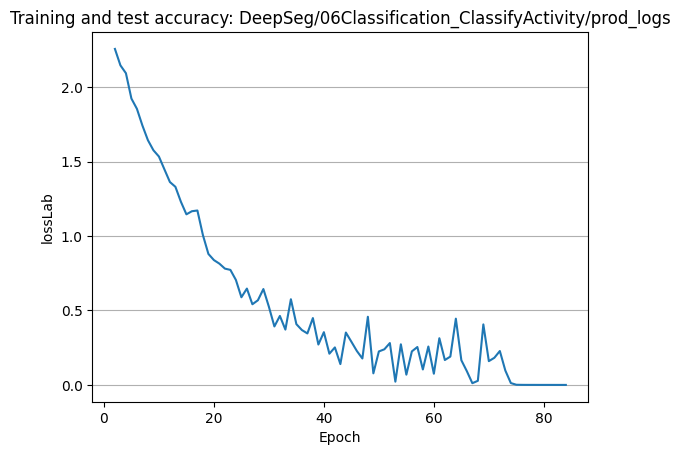

In [87]:
sns.lineplot(data=df[2:], x='Epoch', y='lossLab')
# plt.yscale('log')
# sns.lineplot(data=df, x='Epoch', y='testAcc')
# plt.yticks([i/10 for i in range(0, 11)])
# plt.yticks()
plt.grid(axis='y')
plt.title(f'Training and test accuracy: {split(filename)[0]}')